# **Reading the file**

Importing the necessary packages

In [ ]:
import pandas as pd

Reading the file as a CSV

In [ ]:

df1 = pd.read_csv('Building_Permits_S.csv', index_col=0)
print(df1.head())

# **Linear regression - Single combination**

Importing the necessary packages

In [ ]:
from datetime import datetime
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Importing the regression model

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

Defining the columns of the dataset

In [ ]:
target_column = "Days_to_Issue"
feature_column = "Existing Construction Type"

Checking the missing values on target column

In [ ]:
df1[target_column].isna().sum()

4686

Selecting the column to clean and asign it to the new df1

In [ ]:
df1 = df1[df1[target_column].isna()==False]

Checking the missing values on feature column

In [ ]:
df1[feature_column].isna().sum()

19574

Counting how many time a certain category repeats

In [ ]:
df1[feature_column].value_counts()

,count
Existing Construction Type,
5.0,39771
1.0,11609
3.0,3084
2.0,1115
4.0,161


Replacing missing files with inplace on feature column



In [ ]:
df1[feature_column].fillna(0, inplace=True)

<ipython-input-57-a1ba15e06ec4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[feature_column].fillna(0, inplace=True)


Separating the dataset with x and y

In [ ]:
x = df1.drop(columns=[target_column])
y = df1[target_column]

Split 80 per cent for training and 20 for validation

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)  #what is the meaning of the shuffle? if we have different timing we cannot split 80-20 for years but mix them up

Calculating the score R² from the feature. LinearRegression in sklearn has a built-in method called .score() that automatically calculates the R² score

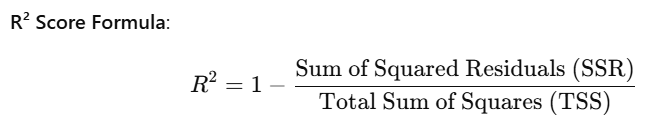

In [ ]:
features = [feature_column]
reg = LinearRegression().fit(x_train[features], y_train)
score = reg.score(x_valid[features], y_valid)
print(res.min(), res.max())


14.258382566145308 62.677482078049074


Printing the score

In [ ]:
print("SCORE: {}".format(score))

SCORE: 0.018245947587508082


# **Linear regression - Multiple features combination**

Import the necessary packages

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Importing linear regression packages and directly the R² score metric for better control

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

File has been imported in iteration 1.
Filling missing in Building Permit dataset

In [ ]:
df1.fillna(0, inplace=True)

Defining different feature combinations

In [ ]:
target_column = 'Days_to_Issue'
feature_combinations = [
    ['Existing Construction Type'],
    ['Permit Type'],
    ['Existing Construction Type', 'Permit Type'],
    ['Permit Creation Month'],
    ['Existing Construction Type', 'Permit Creation Month'],
    ['Existing Construction Type', 'Permit Type', 'Permit Creation Month']
]

Ensuring the permit creation month exists

In [ ]:
if 'Permit Creation Month' not in df1.columns:
    df1['Permit Creation Month'] = pd.to_datetime(df1['Permit Creation Date']).dt.month

Splitting the data into training and validation sets

In [ ]:
x = df1.drop(columns=[target_column])
y = df1[target_column]
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)

Looping through the different combinations.  -
*   storing the results [ ]
*   defining the subsets and extracting each combination features
*   fitting the model
*   predicting results
*   appending results to results [ ]

In [ ]:
results = []

for features in feature_combinations:

    x_train_subset = x_train[features]
    x_valid_subset = x_valid[features]

    model = LinearRegression()
    model.fit(x_train_subset, y_train)

    predictions = model.predict(x_valid_subset)
    score = r2_score(y_valid, predictions)

    results.append({
        "Feature Combination": features,
        "R2 Score": score
    })

Converting results to dataframe and displaying the results

In [ ]:
results_df = pd.DataFrame(results)
print("Feature Combinations Performance:")
print(results_df.sort_values(by="R2 Score", ascending=False))


Feature Combinations Performance:
                                 Feature Combination  R2 Score
5  [Existing Construction Type, Permit Type, Perm...  0.284473
2          [Existing Construction Type, Permit Type]  0.284337
1                                      [Permit Type]  0.275486
4  [Existing Construction Type, Permit Creation M...  0.018695
0                       [Existing Construction Type]  0.018246
3                            [Permit Creation Month]  0.000297


Finding the best combination and printing the best score

In [ ]:
best_result = results_df.sort_values(by="R2 Score", ascending=False).iloc[0]
print("\nBest Feature Combination:")
print(f"Features: {best_result['Feature Combination']}")
print(f"R² Score: {best_result['R2 Score']:.4f}")



Best Feature Combination:
Features: ['Existing Construction Type', 'Permit Type', 'Permit Creation Month']
R² Score: 0.2845


Plotting the results


*   converting 'Feature Combination' column to string type for Matplotlib
*   Plotting the R² scores as a bar chart



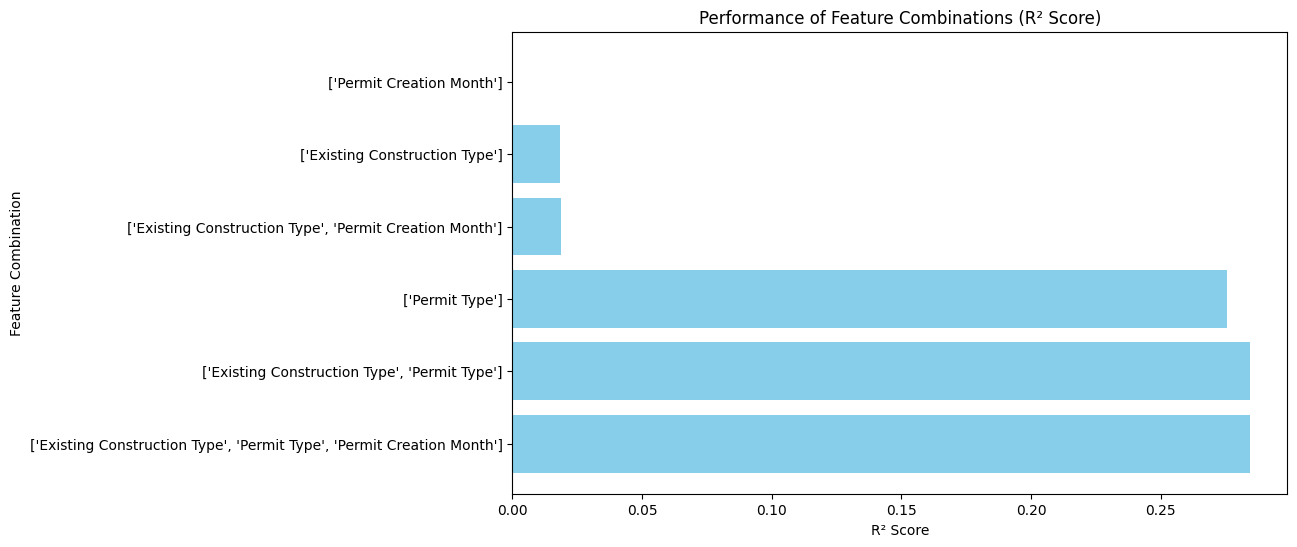

In [ ]:
results_df_sorted = results_df.sort_values(by="R2 Score", ascending=False)
results_df_sorted['Feature Combination'] = results_df_sorted['Feature Combination'].astype(str)

plt.figure(figsize=(10, 6))
plt.barh(results_df_sorted['Feature Combination'], results_df_sorted['R2 Score'], color='skyblue')
plt.xlabel("R² Score")
plt.ylabel("Feature Combination")
plt.title("Performance of Feature Combinations (R² Score)")
plt.show()



# **Ridge & Lasso regression - Multiple features combination**

Importing the necessary packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Importing the models for regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

Cleaning missing data inside the Building permit dataset

In [ ]:
df1.fillna(0, inplace=True)

Defining the target and features combinations

In [ ]:
target_column = 'Days_to_Issue'
feature_combinations = [
    ['Existing Construction Type'],
    ['Permit Type'],
    ['Existing Construction Type', 'Permit Type'],
    ['Permit Creation Month'],
    ['Existing Construction Type', 'Permit Creation Month'],
    ['Existing Construction Type', 'Permit Type', 'Permit Creation Month']
]

Ensuring that permit creation month exist

In [ ]:
if 'Permit Creation Month' not in df1.columns:
    df1['Permit Creation Month'] = pd.to_datetime(df1['Permit Creation Date']).dt.month

Splitting the data into training and validation sets

In [ ]:
x = df1.drop(columns=[target_column])
y = df1[target_column]
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)

Defining the range of alpha values to test for Lasso and Ridge

In [ ]:
alpha_values = [0.01, 0.1, 1.0, 10, 100]

Running the regression models

*   preparing the loop for the regression models
*   applying the linear regression model
*   applying the ridge regression model
*   applying the lasso regression model



In [ ]:
results = []

for features in feature_combinations:
    x_train_subset = x_train[features]
    x_valid_subset = x_valid[features]

    # Linear Regression
    model_lr = LinearRegression()
    model_lr.fit(x_train_subset, y_train)
    predictions_lr = model_lr.predict(x_valid_subset)
    score_lr = r2_score(y_valid, predictions_lr)

    for alpha in alpha_values:
        # Ridge Regression
        model_ridge = Ridge(alpha=alpha)
        model_ridge.fit(x_train_subset, y_train)
        predictions_ridge = model_ridge.predict(x_valid_subset)
        score_ridge = r2_score(y_valid, predictions_ridge)

        #Lasso Regression
        model_lasso = Lasso(alpha=alpha, max_iter=5000)
        model_lasso.fit(x_train_subset, y_train)
        predictions_lasso = model_lasso.predict(x_valid_subset)
        score_lasso = r2_score(y_valid, predictions_lasso)

        #Append results for each alpha
        results.append({
            "Feature Combination": features,
            "Alpha": alpha,
            "Linear R² Score": score_lr,
            "Ridge R² Score": score_ridge,
            "Lasso R² Score": score_lasso
        })


Converting results to a dataframe

In [ ]:
results_df = pd.DataFrame(results)

Plotting the results

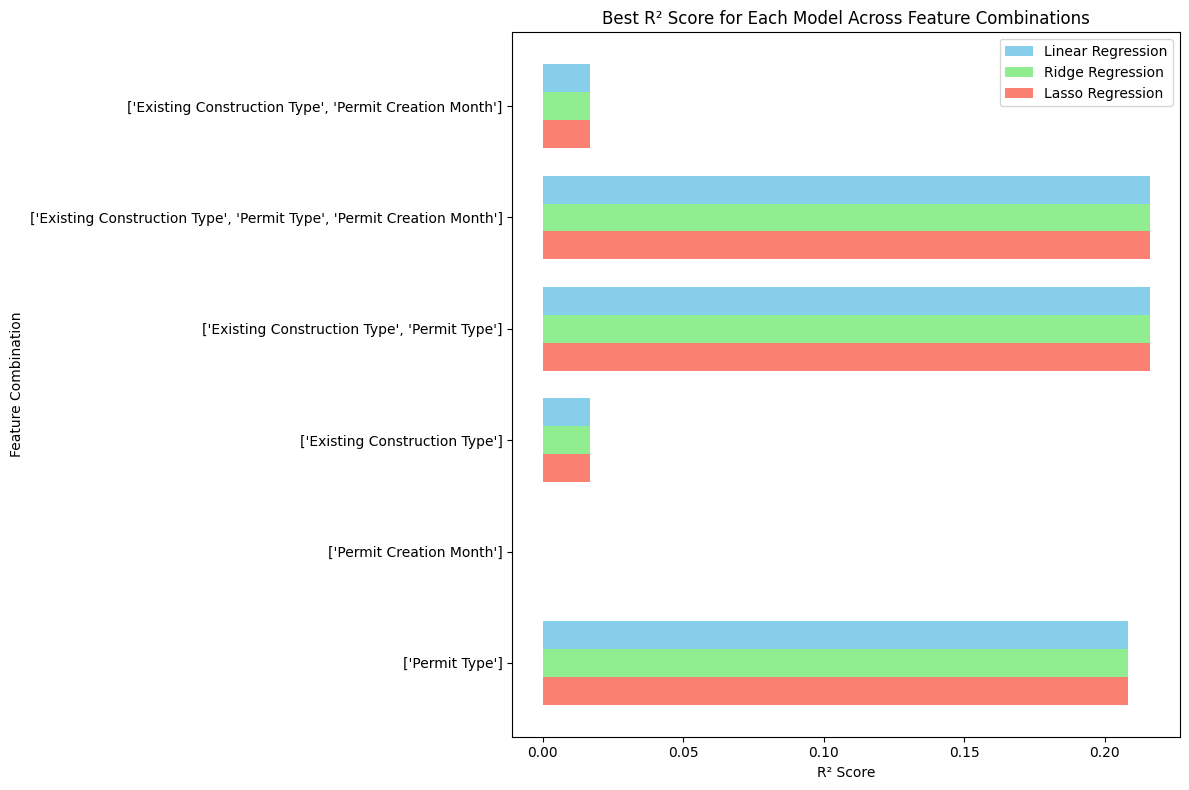

In [ ]:
# Convert 'Feature Combination' to string for grouping and plotting
results_df['Feature Combination'] = results_df['Feature Combination'].astype(str)

# Step 1: Find the best performance for each model and combination
best_results = results_df.groupby('Feature Combination', as_index=False).agg({
    'Linear R² Score': 'max',
    'Ridge R² Score': 'max',
    'Lasso R² Score': 'max'
})

# Step 2: Plot the results for each model
# Define bar positions and width
bar_width = 0.25
y_positions = np.arange(len(best_results['Feature Combination']))

plt.figure(figsize=(12, 8))

# Plot Linear Regression results
plt.barh(y_positions - bar_width, best_results['Linear R² Score'],
         height=bar_width, color='skyblue', label='Linear Regression')

# Plot Ridge Regression results
plt.barh(y_positions, best_results['Ridge R² Score'],
         height=bar_width, color='lightgreen', label='Ridge Regression')

# Plot Lasso Regression results
plt.barh(y_positions + bar_width, best_results['Lasso R² Score'],
         height=bar_width, color='salmon', label='Lasso Regression')

# Step 3: Add labels and customize the plot
plt.yticks(y_positions, best_results['Feature Combination'])
plt.xlabel("R² Score")
plt.ylabel("Feature Combination")
plt.title("Best R² Score for Each Model Across Feature Combinations")
plt.legend()
plt.gca().invert_yaxis()  # Show the best result on top
plt.tight_layout()
plt.show()



Understanding how alpha value changes the prediction

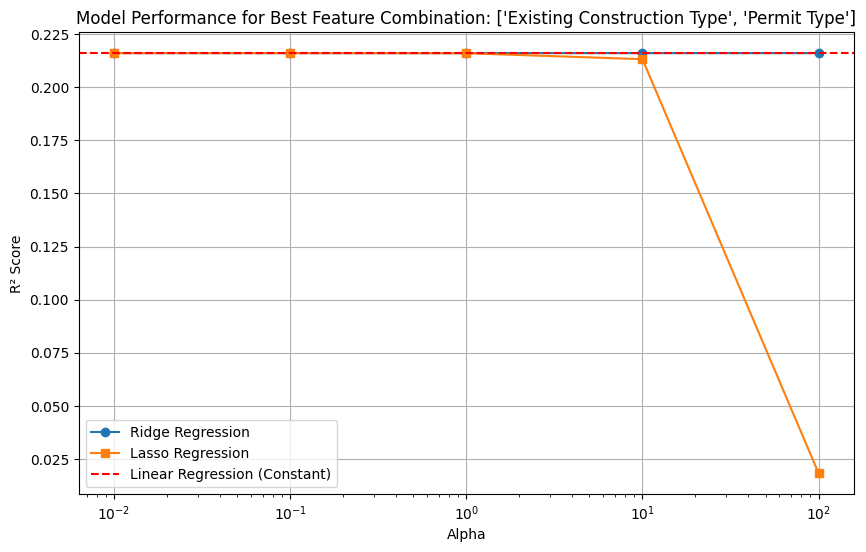

In [ ]:
# Convert 'Feature Combination' to string for grouping, sorting, and plotting
results_df['Feature Combination'] = results_df['Feature Combination'].astype(str)

# Find the best results for each model
best_ridge = results_df.loc[results_df['Ridge R² Score'].idxmax()]
best_lasso = results_df.loc[results_df['Lasso R² Score'].idxmax()]
best_linear = results_df.loc[results_df['Linear R² Score'].idxmax()]

# Plot the R² scores for Ridge, Lasso, and Linear Regression
import matplotlib.pyplot as plt

# Select only the top-performing feature combination for clarity
best_features = best_ridge['Feature Combination']

# Filter results for the best feature combination
filtered_results = results_df[results_df['Feature Combination'] == best_features]

# Plot the results for Ridge, Lasso, and Linear Regression
plt.figure(figsize=(10, 6))
plt.plot(filtered_results['Alpha'], filtered_results['Ridge R² Score'], marker='o', label='Ridge Regression')
plt.plot(filtered_results['Alpha'], filtered_results['Lasso R² Score'], marker='s', label='Lasso Regression')
plt.axhline(y=best_linear['Linear R² Score'], color='red', linestyle='--', label='Linear Regression (Constant)')

plt.xlabel("Alpha")
plt.ylabel("R² Score")
plt.title(f"Model Performance for Best Feature Combination: {best_features}")
plt.legend()
plt.xscale('log')  # Log scale for alpha values
plt.grid()
plt.show()

